In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

max_ = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1=pd.read_csv("Womens_Clothing_E_Commerce_Reviews.csv",index_col=False)
column=['Clothing ID','Age','Title','Review Text','Rating','Recommended IND'
                ,'Positive Feedback Count','Division Name','Department Name','Class Name']

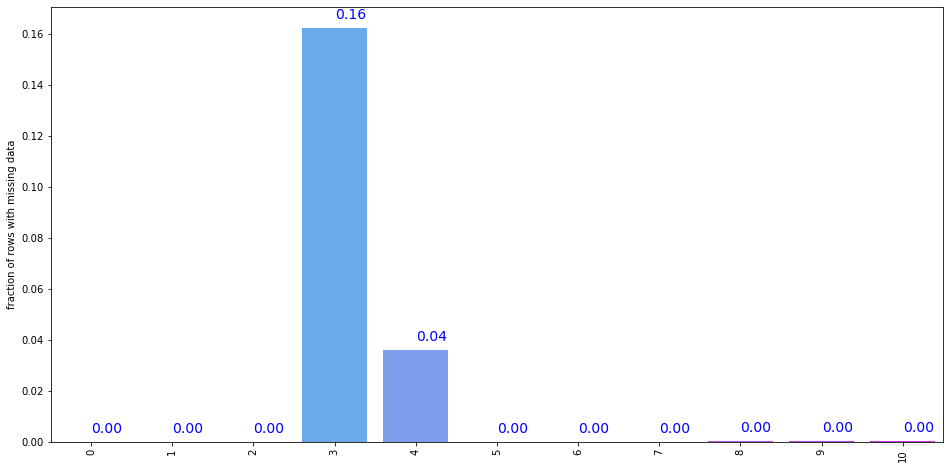

In [36]:
# for null objects

null_counts = df_1.isnull().sum()/len(df_1)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
vis1= sns.barplot(np.arange(len(null_counts)),null_counts,palette='cool')


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')
        
plt.show()

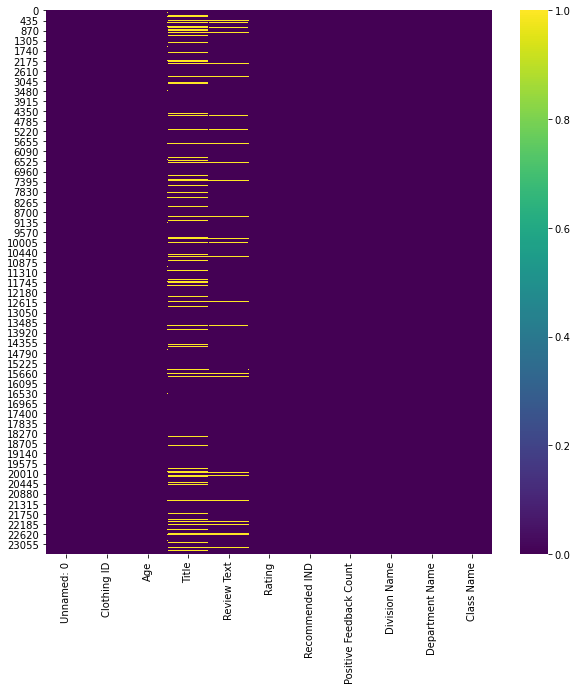

In [23]:
plt.figure(figsize=(10,10))

sns.heatmap(df_1.isnull(), cmap='viridis')

In [3]:
df=pd.DataFrame(data=df_1,columns=column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [4]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [5]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
df=df.dropna(axis=0,how='any')

# Data Visualisation 

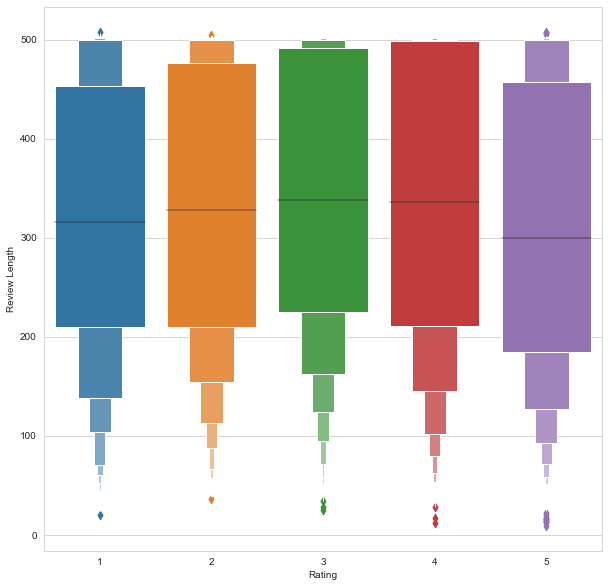

In [61]:
df['Review Text']=df['Review Text'].astype(str)
df['Review Length']=df['Review Text'].apply(len)

#to find the correlation between review length and rating

plt.figure(figsize=(10,10))
vis1=sns.boxenplot(x='Rating', y='Review Length', data=df)




* review length tends to increase as the rating increases and rating 3,4 has more Length compare to others

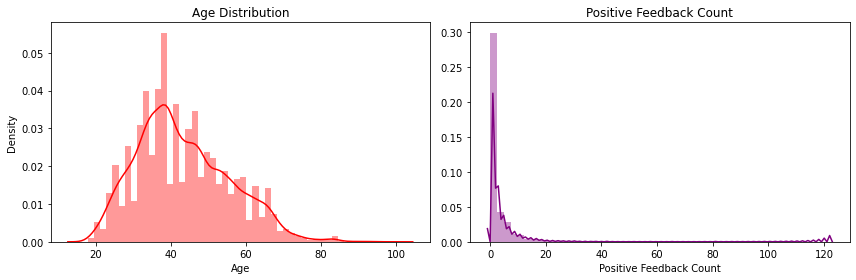

In [8]:
f, ax = plt.subplots(1,2,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0],color="red")
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(df["Positive Feedback Count"], ax=ax[1],color="purple")
ax[1].set_title("Positive Feedback Count")

plt.tight_layout()
plt.show()

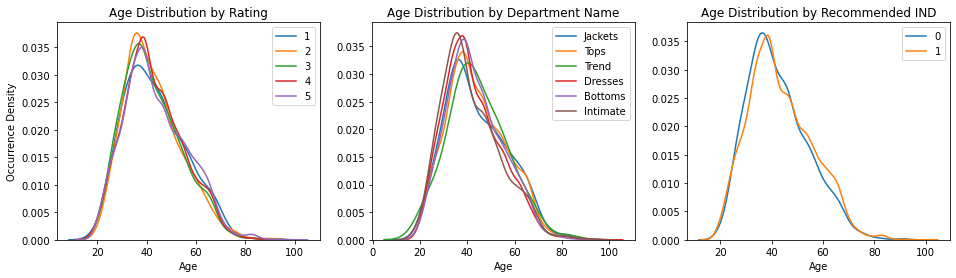

In [29]:
f, axes = plt.subplots(1,3, figsize=(16,4))

p_df = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("Age")
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('Age Distribution by {}'.format(y))

axes[0].set_ylabel('Occurrence Density')
plt.show()

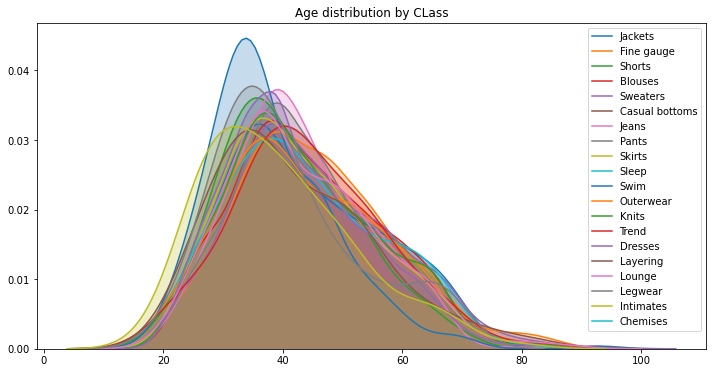

In [41]:
plt.figure(figsize=(12,6))
plt.title("Age distribution by CLass")
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=True,legend=True)

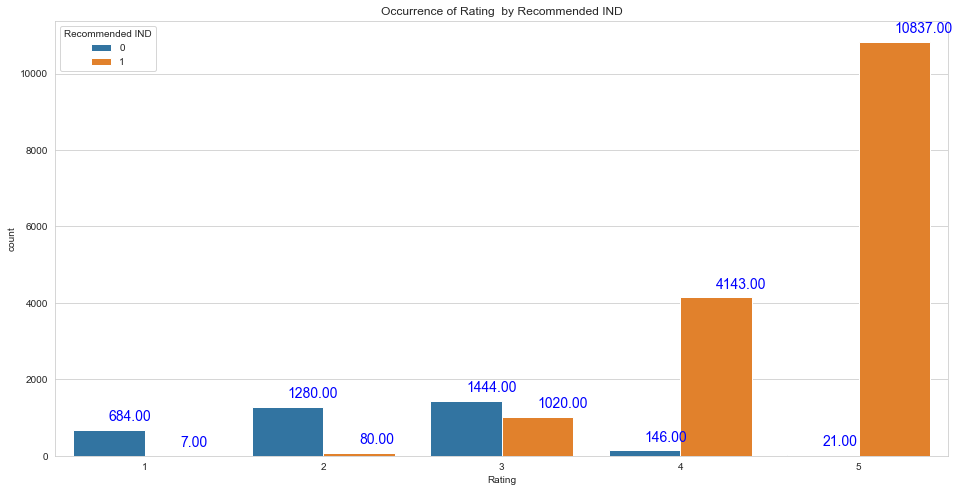

In [68]:
plt.figure(figsize=(16,8))


vis1=sns.countplot(x="Rating", hue="Recommended IND",data=df)
plt.title("Occurrence of Rating  by Recommended IND")


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='left', va='top', fontsize=14, color='blue', xytext=(0, 20),
                 textcoords='offset points')

plt.show()

Text(0.5, 1.0, 'Counts Vs Department Name')

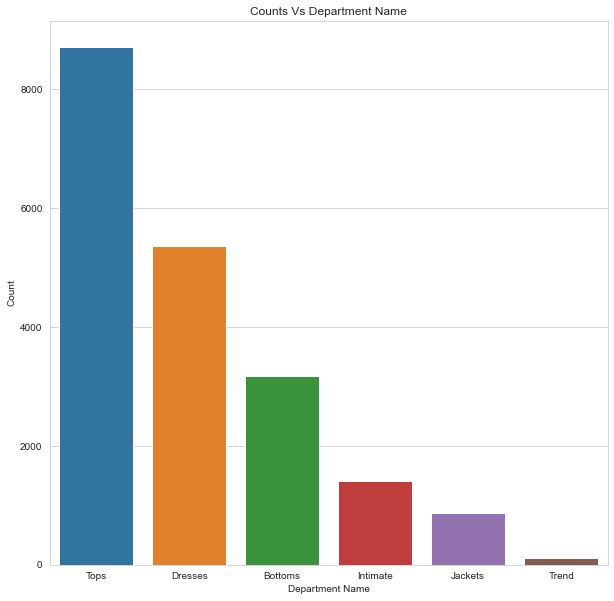

In [77]:
z=df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
vis1=sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")


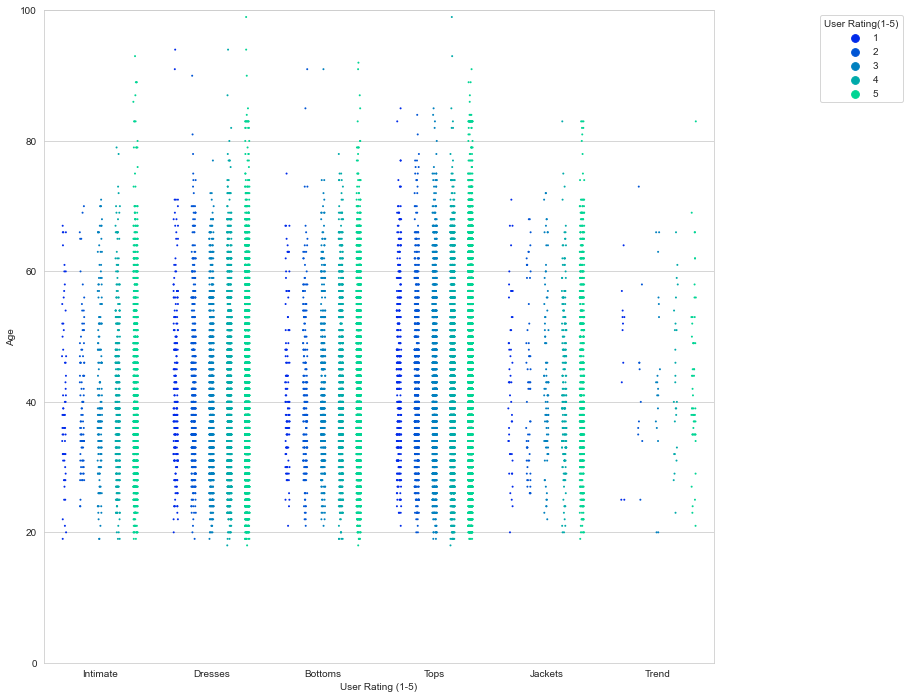

In [73]:
plt.figure(figsize=(12,12))


vis1= sns.stripplot(y='Age' , x='Department Name',data=df_1,
                hue='Rating',dodge=True, size=2,palette='winter')

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 100))
vis1.set(xlabel='User Rating (1-5)',ylabel='Age')


plt.show()

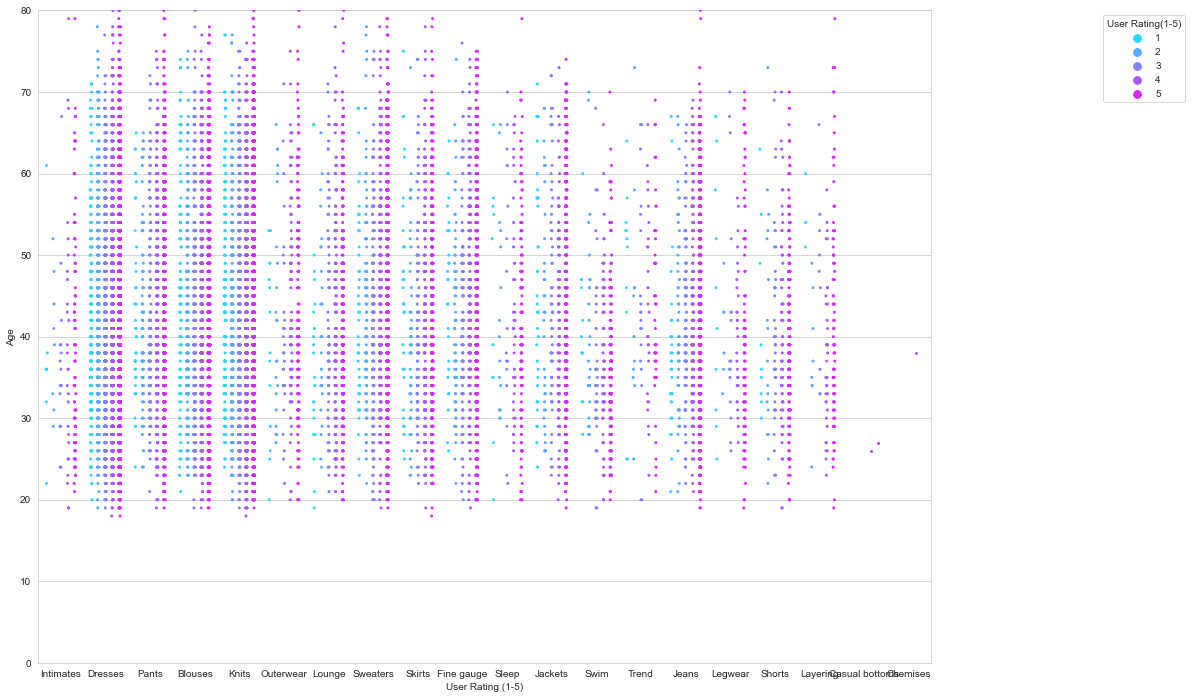

In [76]:
plt.figure(figsize=(16,12))

vis1= sns.stripplot(y='Age' , x='Class Name',data=df_1,
                hue='Rating',dodge=True, size=3,palette='cool')

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 80))
vis1.set(xlabel='User Rating (1-5)',ylabel='Age')


plt.show()

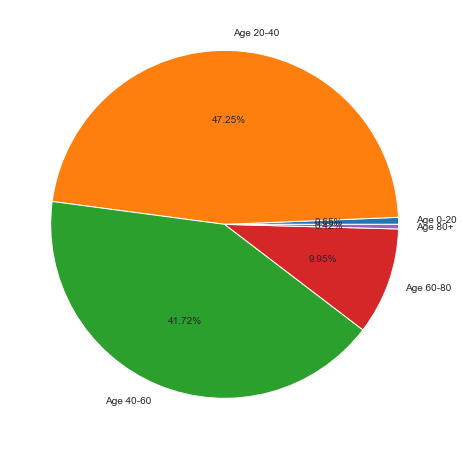

In [85]:
NAR = [df_1.Age[(df_1['Age']<=20)].count(),df_1.Age[(df_1['Age']>20) & (df_1['Age']<=40)].count(),
        df_1.Age[(df_1['Age']>40) & (df_1['Age']<=60)].count(),df_1.Age[(df_1['Age']>60) & (df_1['Age']<=80)].count(),
       df_1.Age[(df_1['Age']>80)].count()]
       

AR = ['Age 0-20','Age 20-40','Age 40-60','Age 60-80','Age 80+']

plt.figure(figsize=(12,8))

plt.pie(NAR, labels=AR, autopct='%.2f%%')
plt.show()

In [ ]:
vis1 = sns.boxenplot(x=df_1.Age_Rating, y=gstatfg.User_Rating, 
                     data=gstatfg, hue=gstatfg.Genre, palette='cool',
                   dodge=True)


vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.5, 1))
plt.show()

***Age group within 30-50 are more prominant in Positive review***

## Word_cloud

In [ ]:
#data cleaning

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

import nltk

from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

import re

a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers -> list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))

stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)

filtered_sentence = []
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# remove words with length less than 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(max_),
                    columns=['Word', 'Frequency'])

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [ ]:
WORD=rslt['Word'].values.tolist()

plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(WORD))
plt.imshow(wc)
plt.axis('off')

# Sentiment Analysis

In [ ]:
## for Sentiment thing...
# Takes loads of time

from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)

for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def function_for_sentiment_analysis(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(function_for_sentiment_analysis, axis=1)

plt.figure(figsize=(10,10))

ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


In [ ]:
positive_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']
neutral_r=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Neutral Review']

# Positive Review

In [ ]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(positive_r["Review"]))
plt.imshow(wc)
plt.axis('off')

# Negative Review

In [ ]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(negative_r["Review"]))
plt.imshow(wc)
plt.axis('off')

# Neutral review

In [ ]:
plt.figure(figsize = (10,12))
wc = WordCloud(background_color = "white", max_words = 1000,  max_font_size = 50)
wc.generate(' '.join(neutral_r["Review"]))
plt.imshow(wc)
plt.axis('off')

In [ ]:
len(neutral_r['Review'])

# importing Classifiers

In [ ]:
#preprocessing to avoid the error due to limited number of iterations possible
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

#Various models-::
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
nb_clf = MultinomialNB()

voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard'
 )

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )

# Data Cleaning 

In [ ]:
import string

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster=LancasterStemmer()

def text_processing(cols):
    a = cols

    # removes punctuation,numbers -> list of words
    b = re.sub('[^A-Za-z]+', ' ', a)

    word_tokens = word_tokenize(b)

    filtered_sentence = []
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
    #lemmatization and stemming
    filtered_sentence = [porter.stem(w) for w in word_tokens]
    filtered_sentence = [lancaster.stem(w) for w in word_tokens]

    # remove words with length less than 2
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    # remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
    
    a=' '.join(cleaned_data_title)
    
    return a

In [ ]:
#text processing for split dataset into train and test.


df['Review Text']=df['Review Text'].apply(text_processing)

### creating new class ###

In [ ]:
def creating_class(cols):
    rating=cols
    
    if rating <= 3:
        return 'BAD'
    else:
        return 'GOOD'

In [ ]:
df['Rating']=df['Rating'].apply(creating_class)

In [ ]:
rating_class = df[(df['Rating'] == "BAD") | (df['Rating'] == "GOOD")]
X_review=rating_class['Review Text']
y=rating_class['Rating']

In [ ]:
#takes a lot of time
from sklearn.feature_extraction.text import CountVectorizer

import string

def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [ ]:
print(len(bow_transformer.vocabulary_))

In [ ]:
#takes a lot of time
X_review = bow_transformer.transform(X_review)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [ ]:
# just for analysis I m considering Naive_Bayes
nb_clf.fit(X_train,y_train)


y_pred=nb_clf.predict(X_test)

print("Naive_bayes", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

### Varification : Predicting Class ((Good / Bad))

In [ ]:
rating_positive=df['Review Text'][101]
print(rating_positive)

rating_positive_transformed = bow_transformer.transform([rating_positive])
nb_clf.predict(rating_positive_transformed)[0]

In [ ]:
rating_negative=df['Review Text'][61]
rating_negative

rating_negative_transformed = bow_transformer.transform([rating_negative])
nb_clf.predict(rating_negative_transformed)[0]

### Predicting response on some random REVIEW

In [ ]:
str1="itchy cut them out then the thread left behind was plasticy and mor itchy how can you I am dissapointed"

rating_transformed = bow_transformer.transform([str1])
nb_clf.predict(rating_transformed)[0]

# Comparison between various models

In [ ]:
max_abs_scaler = preprocessing.MaxAbsScaler()

Results={}

for clf in (log_clf, rnd_clf, svm_clf, voting_clf,bag_clf,nb_clf):
    try:
        clf.min_abs_scaler.fit(X_train, y_train)
    except:
        clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    Results[clf.__class__.__name__]= accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(classification_report(y_test, y_pred))

In [ ]:
# Results

In [ ]:
for i,j in zip(Results.keys(),Results.values()):
    print(i,"      ",j)

# On comparing acuracy for various models
# We come to a verdict that Support Vector Machine works best for our data set